# k-NN

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import neighbors

In [2]:
mnist = fetch_openml('mnist_784', version=1)

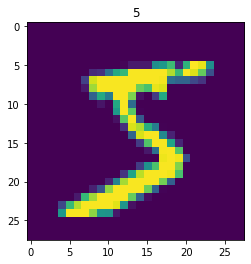

In [3]:
data = np.array(mnist.data)
target = np.array(mnist.target)

img = data[0].reshape((28, 28))
plt.imshow(img, interpolation='nearest')
plt.title(target[0])
plt.show()

In [4]:
sample = np.random.randint(70_000, size=5000)
sample = np.unique(sample)
len(sample)

4830

In [5]:
data = data[sample]
target = target[sample]

In [6]:
len(data)

4830

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

In [8]:
type(xtrain)
xtrain.shape

(3864, 784)

In [9]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [10]:
error = 1 - knn.score(xtest, ytest)
print('Erreur: %f' % error)

Erreur: 0.061077


In [11]:
predict = knn.predict(xtest)
perf_np = (predict == ytest)
print(len(ytest))
print(np.sum(perf_np))
err = 1 - (np.sum(perf_np) / len(perf_np))
err

966
907


0.06107660455486541

In [12]:
xerror = xtest[predict != ytest]
yerror = ytest[predict != ytest]
predict_error = predict[predict != ytest]

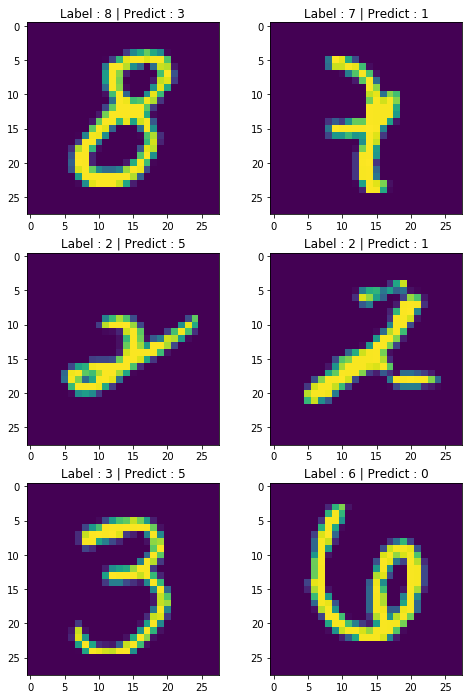

In [13]:
fig = plt.figure(figsize=(8, 12))

for i in range(6):
    fig.add_subplot(3, 2, i+1)
    img = xerror[i].reshape((28, 28))
    plt.imshow(img, interpolation='nearest')
    plt.title(f"Label : {yerror[i]} | Predict : {predict_error[i]}")
plt.show()

In [14]:
k_np = np.arange(1, 16, 1)
errors = np.zeros(15, dtype=float)
knn = neighbors.KNeighborsClassifier()

for k in k_np:
    knn.n_neighbors = k
    knn.fit(xtrain, ytrain)
    errors[k-1] = 1 - knn.score(xtest, ytest)

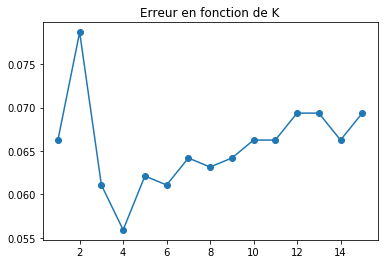

In [15]:
plt.plot(k_np, errors, marker='o')
plt.title('Erreur en fonction de K')
plt.show()